In [41]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from xgboost import XGBClassifier

# Load the dataset
data_labeled = pd.read_csv("labeled_data.csv",sep=";")
data_unlabeled = pd.read_csv("unlabeled_data.csv", sep=";")



In [42]:
# Check the first few rows and the shape of the DataFrame
print(data_labeled.shape)
data_labeled.head()

(37636, 26)


,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value,Label
0,11224,Chevrolet,Matiz,16_12,2018,8,Silver,2008.0,Hatchback,61200,...,Excessive Emissions,0,7,2018-08-07,1,20.6291,1.0,2018-08-07,664.756621,0
1,13673,Ford,Kuga,29_25,2018,5,White,2015.0,SUV,36579,...,Radiator Leaking,0,9,2018-05-09,1,283.8200,2.0,2018-05-09,11581.844041,0
2,9528,Ford,Fiesta,29_13,2018,7,Red,2010.0,Hatchback,71000,...,Engine Issue,3,14,2018-07-14,1,500.0000,12.0,2018-07-17,2469.094896,0
3,40424,DS,3,21_1,2018,3,Black,2017.0,Hatchback,6449,...,Flat Tyres,0,25,2018-03-25,2,44.0374,2.0,2018-03-25,12785.925744,0
4,10711,Ford,S-Max,29_31,2018,5,White,2014.0,MPV,63751,...,Windscreen Crack,0,14,2018-05-14,1,27.0794,1.0,2018-05-14,11203.607999,0


In [43]:
# Check the first few rows and the shape of the DataFrame
print(data_unlabeled.shape)
data_unlabeled.head()

(16130, 25)


,ID,Maker,Genmodel,Genmodel_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Door_num,issue,issue_id,Adv_day,breakdown_date,repair_complexity,repair_cost,repair_hours,repair_date,value
0,29455,Ford,Kuga,29_25,2018,4,Green,2015.0,SUV,34000,...,5.0,Starter Motor Issue,0,15,2018-04-15,1,232.9000,3.0,2018-04-15,16423.784707
1,41446,Fiat,500,28_2,2018,8,White,2009.0,Hatchback,65000,...,3.0,Warning Light,0,6,2018-08-06,1,219.8000,9.0,2018-08-08,3784.524678
2,42116,Fiat,500,28_2,2018,4,Black,2012.0,Hatchback,54491,...,3.0,Flat Tyres,0,24,2018-04-24,1,21.3485,1.0,2018-04-24,4272.171246
3,32619,Citroen,DS4,21_3,2018,7,Silver,2011.0,Hatchback,98000,...,5.0,Starter Motor Issue,0,12,2018-07-12,2,167.9500,6.0,2018-07-13,4552.297593
4,51078,Abarth,595,2_4,2018,6,Red,2014.0,Hatchback,49583,...,3.0,Brake Pads Worn,0,20,2018-06-20,2,85.5000,4.0,2018-06-21,10447.615695


In [44]:
#check non-null valus and describe the data
data_labeled.info()
data_labeled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37636 entries, 0 to 37635
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 37636 non-null  int64  
 1   Maker              37636 non-null  object 
 2    Genmodel          37636 non-null  object 
 3    Genmodel_ID       37636 non-null  object 
 4   Adv_year           37636 non-null  int64  
 5   Adv_month          37636 non-null  int64  
 6   Color              37636 non-null  object 
 7   Reg_year           37636 non-null  float64
 8   Bodytype           37636 non-null  object 
 9   Runned_Miles       37636 non-null  int64  
 10  Engin_size         37636 non-null  object 
 11  Gearbox            37636 non-null  object 
 12  Fuel_type          37636 non-null  object 
 13  Price              37636 non-null  float64
 14  Seat_num           37636 non-null  float64
 15  Door_num           37636 non-null  float64
 16  issue              376

,ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,issue_id,Adv_day,repair_complexity,repair_cost,repair_hours,value,Label
count,37636.000000,37636.000000,37636.000000,37636.000000,37636.000000,3.763600e+04,37636.000000,37636.000000,37636.000000,37636.000000,37636.000000,37636.000000,37636.000000,3.763600e+04,37636.000000
mean,26868.570199,2006.104900,5.682352,2012.382639,48194.858752,1.184000e+04,5.114040,4.345653,0.499681,14.485997,1.281566,309.050330,53.423268,1.124802e+04,0.109868
std,15535.763496,147.533118,2.072882,4.567317,39475.087212,3.404482e+04,1.640498,1.115353,1.133672,8.089406,0.545602,1547.474509,718.339249,3.234256e+04,0.312730
min,2.000000,202.000000,1.000000,1960.000000,-19826.000000,1.250000e+02,2.000000,0.000000,0.000000,1.000000,1.000000,-44470.000000,0.500000,1.123048e+02,0.000000
25%,13373.500000,2018.000000,4.000000,2009.000000,15389.750000,3.500000e+03,5.000000,3.000000,0.000000,7.000000,1.000000,25.157000,1.000000,3.327641e+03,0.000000
50%,26832.000000,2018.000000,5.000000,2013.000000,39249.000000,7.343500e+03,5.000000,5.000000,0.000000,14.000000,1.000000,84.296500,2.000000,6.975036e+03,0.000000
75%,40341.750000,2018.000000,7.000000,2016.000000,74204.500000,1.199000e+04,5.000000,5.000000,0.000000,22.000000,1.000000,243.242500,6.000000,1.138671e+04,0.000000
max,53766.000000,2021.000000,13.000000,2019.000000,900000.000000,2.599990e+06,20.000000,7.000000,5.000000,28.000000,4.000000,98690.116330,73134.610091,2.469993e+06,1.000000


In [45]:
#check non-null valus and describe the data
data_unlabeled.info()
data_unlabeled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16130 entries, 0 to 16129
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 16130 non-null  int64  
 1   Maker              16130 non-null  object 
 2    Genmodel          16130 non-null  object 
 3    Genmodel_ID       16130 non-null  object 
 4   Adv_year           16130 non-null  int64  
 5   Adv_month          16130 non-null  int64  
 6   Color              16130 non-null  object 
 7   Reg_year           16130 non-null  float64
 8   Bodytype           16130 non-null  object 
 9   Runned_Miles       16130 non-null  int64  
 10  Engin_size         16130 non-null  object 
 11  Gearbox            16130 non-null  object 
 12  Fuel_type          16130 non-null  object 
 13  Price              16130 non-null  float64
 14  Seat_num           16130 non-null  float64
 15  Door_num           16130 non-null  float64
 16  issue              161

,ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,issue_id,Adv_day,repair_complexity,repair_cost,repair_hours,value
count,16130.000000,16130.000000,16130.000000,16130.000000,16130.000000,1.613000e+04,16130.000000,16130.000000,16130.000000,16130.000000,16130.000000,16130.000000,16130.000000,1.613000e+04
mean,26918.335586,2006.910601,5.687601,2012.324613,48315.702294,1.222558e+04,5.085121,4.348977,0.497768,14.481401,1.283881,311.204484,66.822584,1.161424e+04
std,15487.095203,142.563826,2.079915,4.593881,40199.379087,3.562358e+04,1.546119,1.112513,1.131461,8.071887,0.550568,3053.690673,1568.566239,3.384234e+04
min,1.000000,202.000000,1.000000,1970.000000,-19585.000000,1.000000e+02,2.000000,0.000000,0.000000,1.000000,1.000000,-200464.259198,0.500000,9.984776e+01
25%,13595.500000,2018.000000,4.000000,2009.000000,15579.000000,3.571250e+03,5.000000,3.000000,0.000000,8.000000,1.000000,24.995000,1.000000,3.389750e+03
50%,26997.000000,2018.000000,5.000000,2013.000000,39555.000000,7.295000e+03,5.000000,5.000000,0.000000,14.000000,1.000000,83.798500,2.000000,6.927846e+03
75%,40298.750000,2018.000000,7.000000,2016.000000,74432.250000,1.189900e+04,5.000000,5.000000,0.000000,21.000000,1.000000,242.950000,6.000000,1.130483e+04
max,53760.000000,2021.000000,12.000000,2019.000000,880000.000000,2.200000e+06,20.000000,6.000000,5.000000,28.000000,4.000000,204334.464171,180985.493395,2.089990e+06


In [46]:
data_labeled.isnull().sum()


ID                   0
Maker                0
 Genmodel            0
 Genmodel_ID         0
Adv_year             0
Adv_month            0
Color                0
Reg_year             0
Bodytype             0
Runned_Miles         0
Engin_size           0
Gearbox              0
Fuel_type            0
Price                0
Seat_num             0
Door_num             0
issue                0
issue_id             0
Adv_day              0
breakdown_date       0
repair_complexity    0
repair_cost          0
repair_hours         0
repair_date          0
value                0
Label                0
dtype: int64

In [47]:
data_unlabeled.isnull().sum()

ID                   0
Maker                0
 Genmodel            0
 Genmodel_ID         0
Adv_year             0
Adv_month            0
Color                0
Reg_year             0
Bodytype             0
Runned_Miles         0
Engin_size           0
Gearbox              0
Fuel_type            0
Price                0
Seat_num             0
Door_num             0
issue                0
issue_id             0
Adv_day              0
breakdown_date       0
repair_complexity    0
repair_cost          0
repair_hours         0
repair_date          1
value                0
dtype: int64

In [ ]:
#Inpect unique values in each column
columns = ['ID', 'Maker', 'Genmodel', 'Genmodel_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue',
       'issue_id', 'Adv_day', 'breakdown_date', 'repair_complexity',
       'repair_cost', 'repair_hours', 'repair_date', 'value', 'Label']

#rename columns by removing leading spaces
data_labeled.columns = [col.strip() for col in data_labeled.columns]    
data_unlabeled.columns = [col.strip() for col in data_unlabeled.columns]

#print complete value counts for each column
for col in columns:
    print(f"Value counts for column '{col}':")
    print(data_labeled[col].value_counts(dropna=False))
    print("\n")
    #data_labeled[col].value_counts(dropna=False).to_csv(f"value_counts_labeled_{col}.csv")





Value counts for column 'ID':
ID
11224    1
13673    1
9528     1
40424    1
10711    1
        ..
13233    1
27427    1
18       1
29733    1
20689    1
Name: count, Length: 37636, dtype: int64


Value counts for column 'Maker':
Maker
Ford          18763
Citroen        6504
Fiat           4497
Honda          3555
Dacia          1223
Bentley         762
Chevrolet       511
DS              482
Ferrari         413
Abarth          289
Chrysler        263
Hyundai         175
Dodge            85
Daihatsu         67
Daewoo           11
Great Wall       11
Hummer            9
Cadillac          5
GMC               3
Caterham          3
DAX               1
Grinnall          1
Bugatti           1
Daimler           1
Corvette          1
Name: count, dtype: int64


Value counts for column 'Genmodel':
Genmodel
Focus        3612
Fiesta       3318
Mondeo       2191
500          1966
Kuga         1800
             ... 
Enzo            1
XJ Series       1
C7              1
Azure           1
850        

**Data Cleaning and Engineering:**  <br>
* In Colors, combine Yellow and Gelb
* In Fuel Type, combine Diesel and still_Diesel_but_you_found_an_easteregg
* In Reg_year,Adv_year, make year Integer
* In Issue, Remove trailing white spaces in some values
* Drop rows with year "202"



In [49]:
#print columns for unlabeled data
print(data_unlabeled.columns)

Index(['ID', 'Maker', 'Genmodel', 'Genmodel_ID', 'Adv_year', 'Adv_month',
       'Color', 'Reg_year', 'Bodytype', 'Runned_Miles', 'Engin_size',
       'Gearbox', 'Fuel_type', 'Price', 'Seat_num', 'Door_num', 'issue',
       'issue_id', 'Adv_day', 'breakdown_date', 'repair_complexity',
       'repair_cost', 'repair_hours', 'repair_date', 'value'],
      dtype='object')


In [50]:
#Replace 'Gelb' with 'Yellow' in Color column
data_labeled['Color'] = data_labeled['Color'].replace('Gelb', 'Yellow')
data_unlabeled['Color'] = data_unlabeled['Color'].replace('Gelb', 'Yellow')

#Replace 'still_Diesel_but_you_found_an_easteregg' with 'Diesel' in Fuel_type column
data_labeled['Fuel_type'] = data_labeled['Fuel_type'].replace('still_Diesel_but_you_found_an_easteregg', 'Diesel')
data_unlabeled['Fuel_type'] = data_unlabeled['Fuel_type'].replace('still_Diesel_but_you_found_an_easteregg', 'Diesel')



In [51]:
#change datatype of Reg_year to Integer
data_labeled['Reg_year'] = pd.to_numeric(data_labeled['Reg_year'], errors='coerce').astype('Int64')
data_unlabeled['Reg_year'] = pd.to_numeric(data_unlabeled['Reg_year'], errors='coerce').astype('Int64')

#change datatype of Adv_year to Integer
data_labeled['Adv_year'] = pd.to_numeric(data_labeled['Adv_year'], errors='coerce').astype('Int64')
data_unlabeled['Adv_year'] = pd.to_numeric(data_unlabeled['Adv_year'], errors='coerce').astype('Int64')

#Remove leading white spaces in issue column
data_labeled['issue'] = data_labeled['issue'].str.strip()
data_unlabeled['issue'] = data_unlabeled['issue'].str.strip()




In [52]:
#drop rows with  Adv_year "202"
data_labeled = data_labeled[data_labeled['Adv_year'] != 202]
data_unlabeled = data_unlabeled[data_unlabeled['Adv_year'] != 202]



In [53]:
#describe data after cleaning
data_labeled.describe()

,ID,Adv_year,Adv_month,Reg_year,Runned_Miles,Price,Seat_num,Door_num,issue_id,Adv_day,repair_complexity,repair_cost,repair_hours,value,Label
count,37386.000000,37386.0,37386.000000,37386.0,37386.000000,3.738600e+04,37386.000000,37386.000000,37386.000000,37386.000000,37386.000000,37386.000000,37386.000000,3.738600e+04,37386.000000
mean,26866.602659,2018.16894,5.657679,2012.338389,48446.922698,1.178213e+04,5.114508,4.343578,0.500615,14.493500,1.281041,306.984049,53.359590,1.119304e+04,0.110175
std,15534.863133,0.807498,2.047301,4.550285,39481.984136,3.404137e+04,1.641158,1.116508,1.134932,8.086735,0.545437,1503.596093,718.911784,3.233928e+04,0.313112
min,2.000000,2012.0,1.000000,1960.0,-19826.000000,1.250000e+02,2.000000,0.000000,0.000000,1.000000,1.000000,-44470.000000,0.500000,1.123048e+02,0.000000
25%,13370.250000,2018.0,4.000000,2009.0,15666.000000,3.499000e+03,5.000000,3.000000,0.000000,7.000000,1.000000,25.100000,1.000000,3.324551e+03,0.000000
50%,26835.500000,2018.0,5.000000,2013.0,39688.000000,7.295000e+03,5.000000,5.000000,0.000000,14.000000,1.000000,84.185000,2.000000,6.927927e+03,0.000000
75%,40340.750000,2018.0,7.000000,2016.0,74657.750000,1.190000e+04,5.000000,5.000000,0.000000,22.000000,1.000000,242.500000,6.000000,1.130683e+04,0.000000
max,53766.000000,2021.0,13.000000,2019.0,900000.000000,2.599990e+06,20.000000,7.000000,5.000000,28.000000,4.000000,98690.116330,73134.610091,2.469993e+06,1.000000


In [54]:
label_0_df = data_labeled[data_labeled['Label'] == 0]
label_1_df = data_labeled[data_labeled['Label'] == 1]

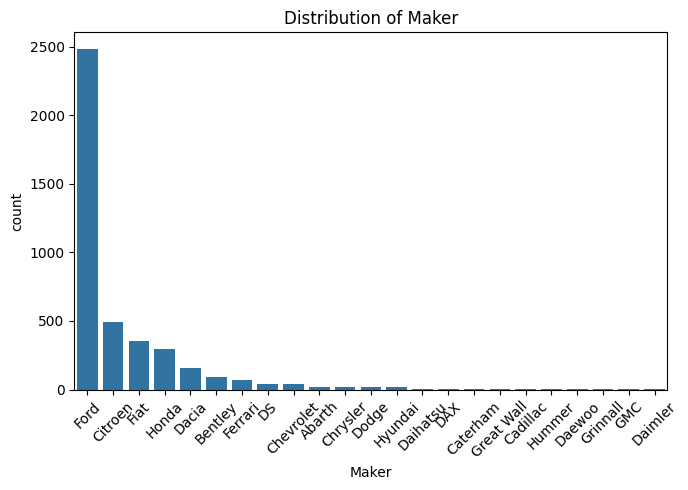

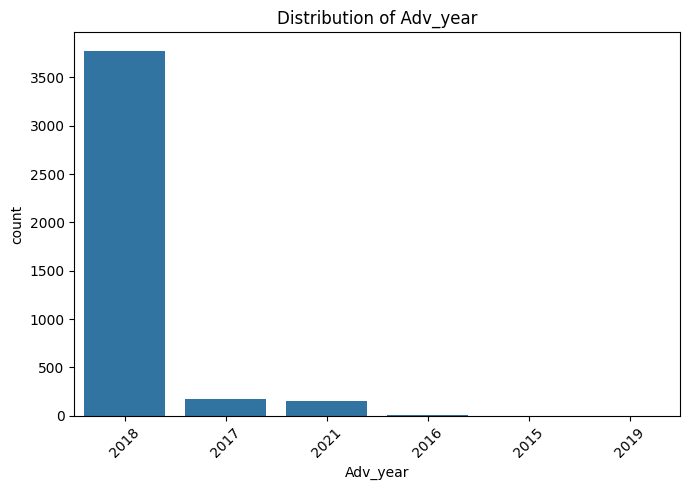

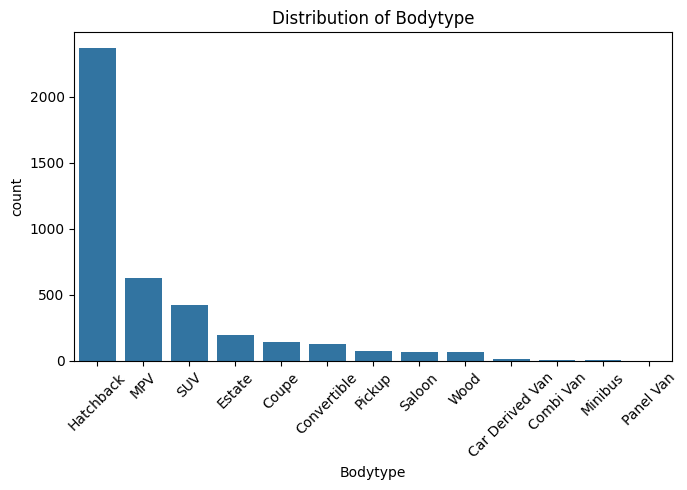

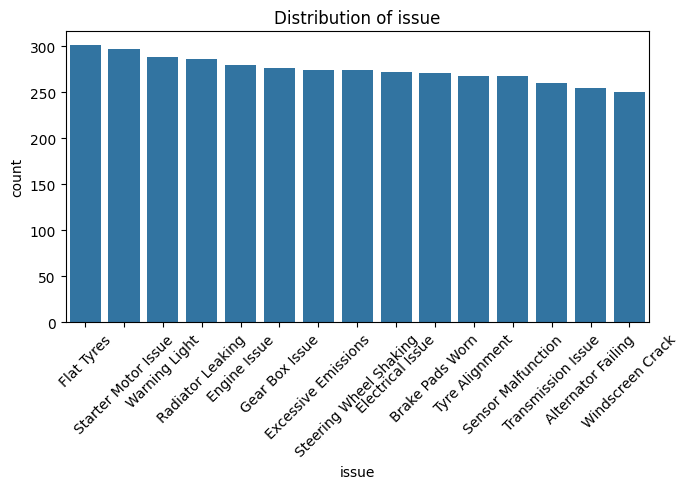

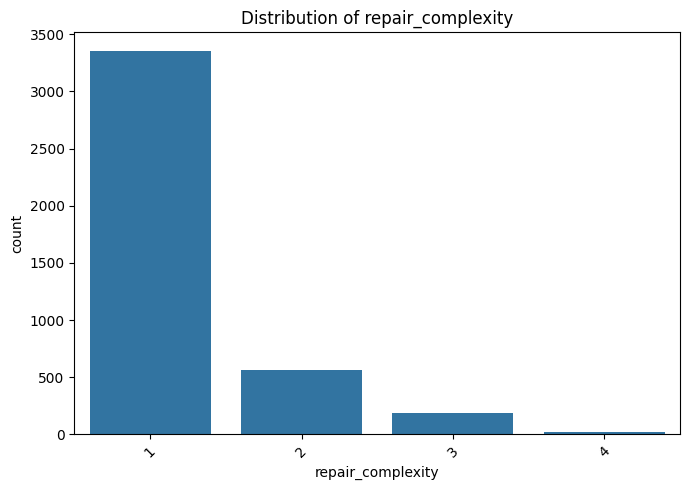

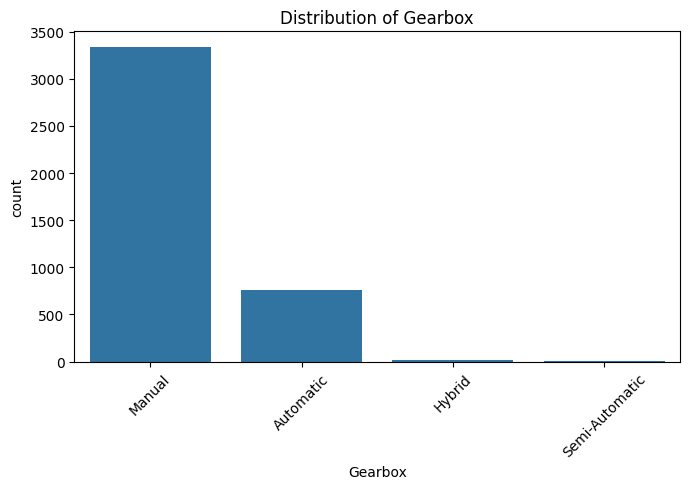

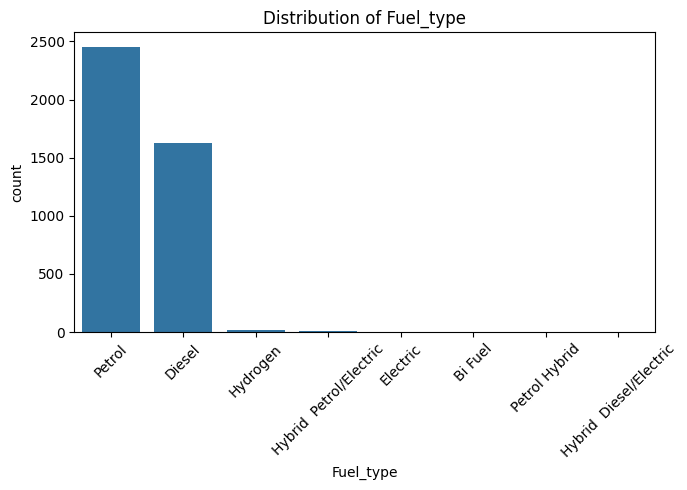

In [55]:
#Plot distributions
categorical_columns = ['Maker', 'Adv_year','Bodytype', 'issue',  'repair_complexity',
       'Gearbox', 'Fuel_type']
for col in categorical_columns:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=label_1_df, x=col, order=label_1_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

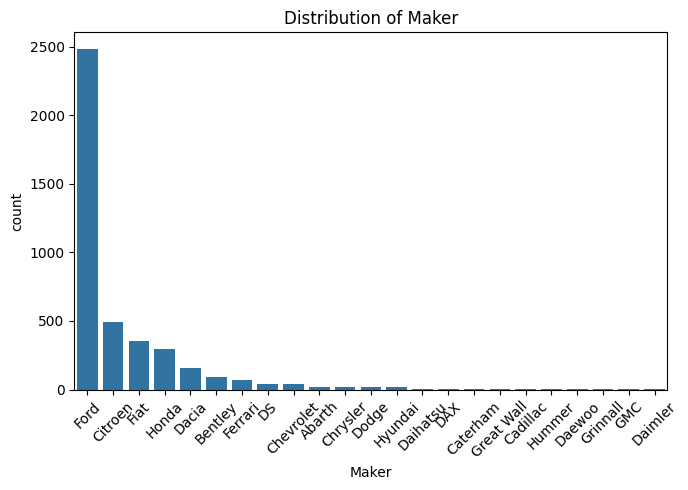

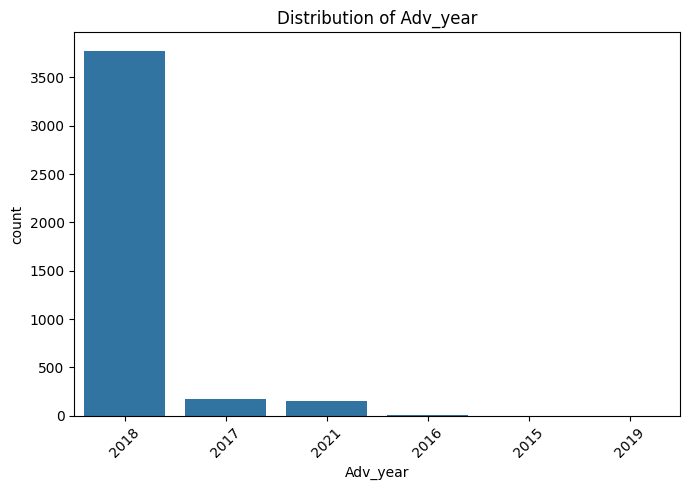

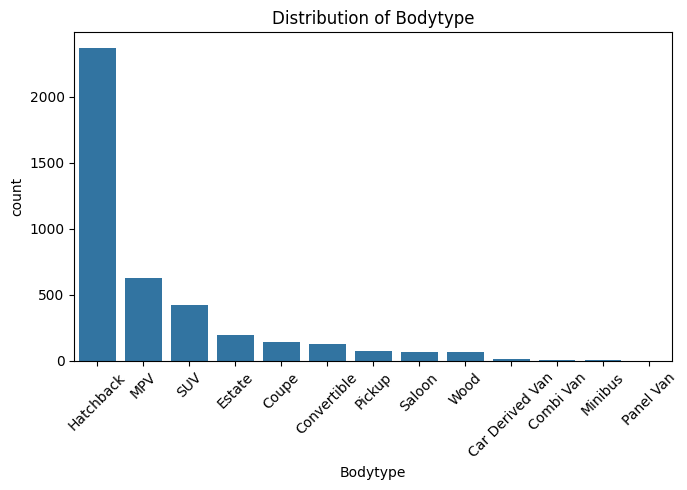

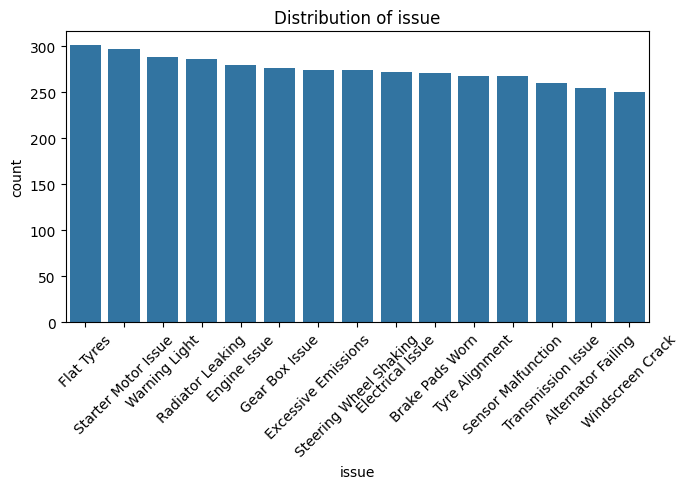

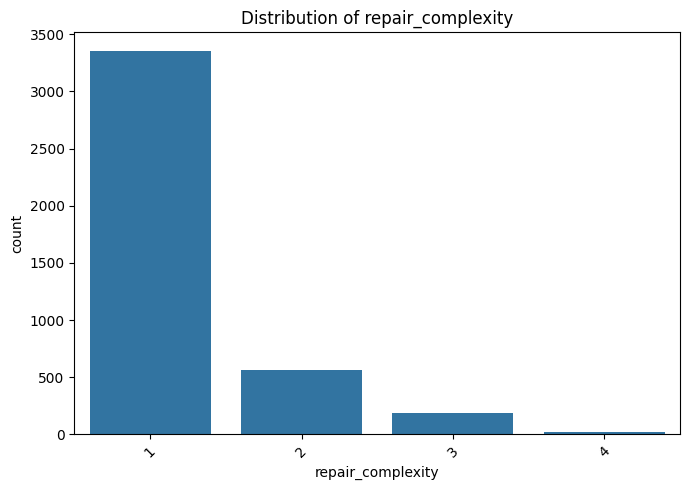

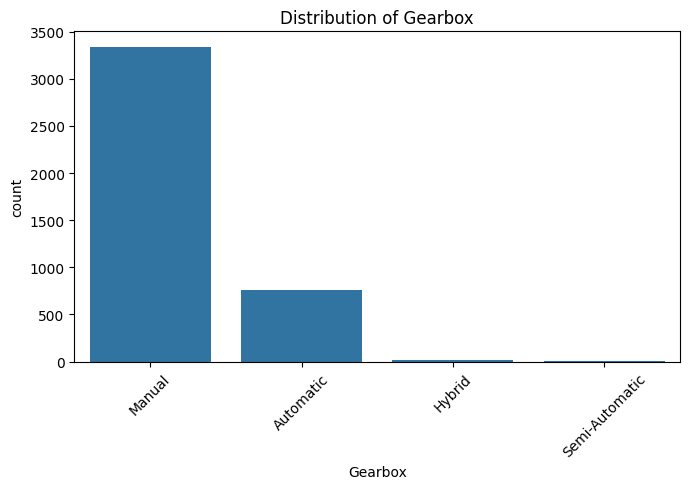

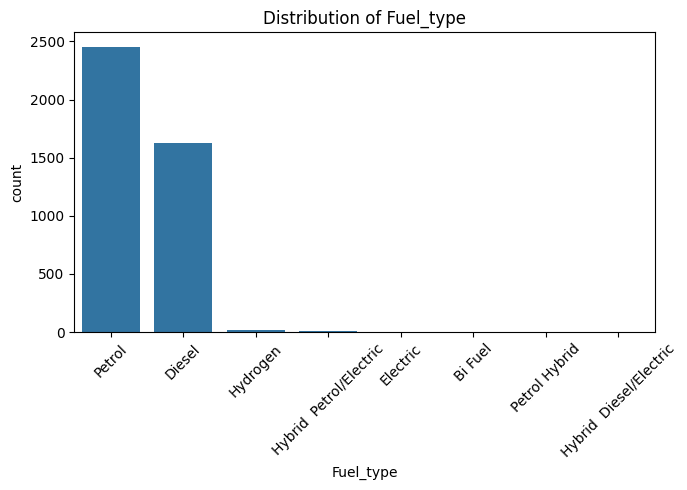

In [56]:
#Plot distributions where Claim is successful
categorical_columns = ['Maker', 'Adv_year','Bodytype','issue',  'repair_complexity',
       'Gearbox', 'Fuel_type']
for col in categorical_columns:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=label_1_df, x=col, order=label_1_df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

**Distribution plots are similar between label=0 and label=1**  
<br>
* Top Maker is Ford
* Top gearbox is Manual
* Top Adv_year is 2018
* Top Fuel_type is Petrol


